In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

At this model I want to predict strength of concrete by looking all of the variables.

# **Reading Data**

In [37]:
data=pd.read_csv(r"C:\Users\Shwet\Downloads\concrete_data.csv")

In [38]:
data.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [39]:
data.shape

(1030, 9)

In [40]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

One column name is "fine_aggregate ", we have an extra space. We need to get rid of it.

In [41]:
data=data.rename({"fine_aggregate ":"fine_aggregate"},axis=1)

In [42]:
data["fly_ash"].unique()

array([  0. ,  96.7,  94.6, 100.5, 125.4, 121.6, 118.3, 125.2, 163.3,
       163.8,  24.5, 118.2,  94.1,  95.7, 100.4, 124.8, 167. , 122. ,
       124.3,  96.2,  97.4,  95.6,  99.9,  98.8, 125.1, 121.4, 117.5,
       174.7, 174.2, 123.8, 121.9, 124.1,  59. ,  60. , 136. , 158. ,
       163. , 119. ,  95. , 120. , 143.6, 132.1, 118.6, 128.6, 172.4,
       173.5, 159.9,  79. ,  94. ,  97. , 123. , 132. , 141. ,  82. ,
       148. , 112. ,  89. , 139. , 111. , 175. , 116. , 100. , 184. ,
       130. , 107. ,  76. , 150. , 146. , 126. , 142. , 161. , 200. ,
       113. , 128. ,  86. ,  90. , 109. ,  78. ,  71. , 103. , 137. ,
       138. , 195. , 185. ,  92. , 143. , 134. , 133. , 166. ,  87. ,
       106. , 182. ,  91. , 179. ,  77. , 172. ,  98. , 164. , 152. ,
       194. , 193. , 190. , 187. ,  71.5, 106.7, 111.9, 103.3, 119.8,
       136.6, 137.9,  86.1, 194.9, 185.3,  89.6,  91.7, 142.7,  78.4,
       133.6, 132.6, 142.8, 165.7,  87.5, 113.2, 106.2, 182.1, 107.5,
       143.2, 178.9,

I wanted to be sure if fly_ash is numerical variable. And as we can see all the data contains numerical variables.

In [43]:
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

All of them are in correct type. We don't have to worry about it.

In [44]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

It is nice because there is no any null value.

In [45]:
def outlier_graph(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

To see outliers I made a function.

C:\Users\Shwet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shwet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shwet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shwet\anaconda3\lib\si

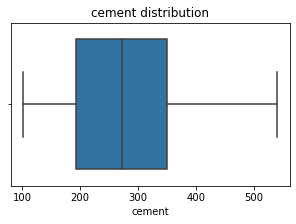

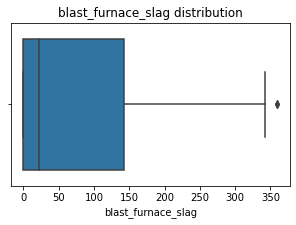

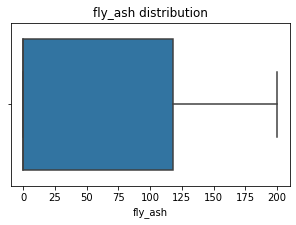

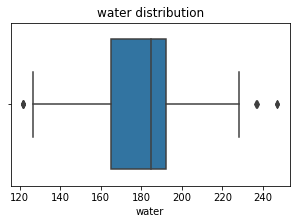

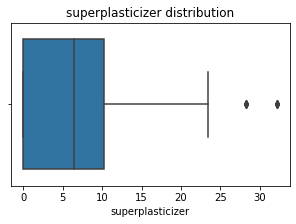

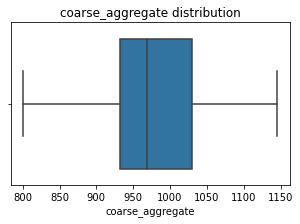

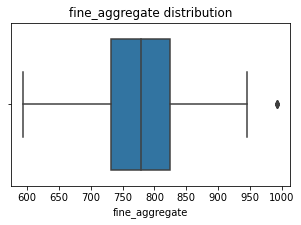

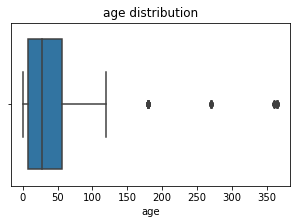

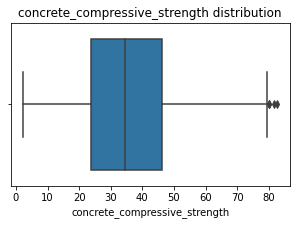

In [46]:
for i in data.columns:
    outlier_graph(data,i)


There are some outliers that we need to get rid of.

In [47]:
def min_max_show(data,column):
    print("min value of {} is {} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

It will show us the min and max values and it will make easy to erase them.

In [48]:
for i in data.columns:
    min_max_show(data,i)

min value of cement is 102.0 
max value of cement is 540.0
min value of blast_furnace_slag is 0.0 
max value of blast_furnace_slag is 359.4
min value of fly_ash is 0.0 
max value of fly_ash is 200.1
min value of water is 121.8 
max value of water is 247.0
min value of superplasticizer is 0.0 
max value of superplasticizer is 32.2
min value of coarse_aggregate is 801.0 
max value of coarse_aggregate is 1145.0
min value of fine_aggregate is 594.0 
max value of fine_aggregate is 992.6
min value of age is 1 
max value of age is 365
min value of concrete_compressive_strength is 2.33 
max value of concrete_compressive_strength is 82.6


In [49]:
data=data[data["blast_furnace_slag"]<350]
data=data[(data["water"]<246) & (data["water"]>122)]
data=data[data["superplasticizer"]<25]
data=data[data["fine_aggregate"]<992]
data=data[data["age"]<150]

I didn't put concrete_compressive_strength since its outliers are very close to normal range. I just erased the far ones.

# **Data Visualization**

<AxesSubplot:>

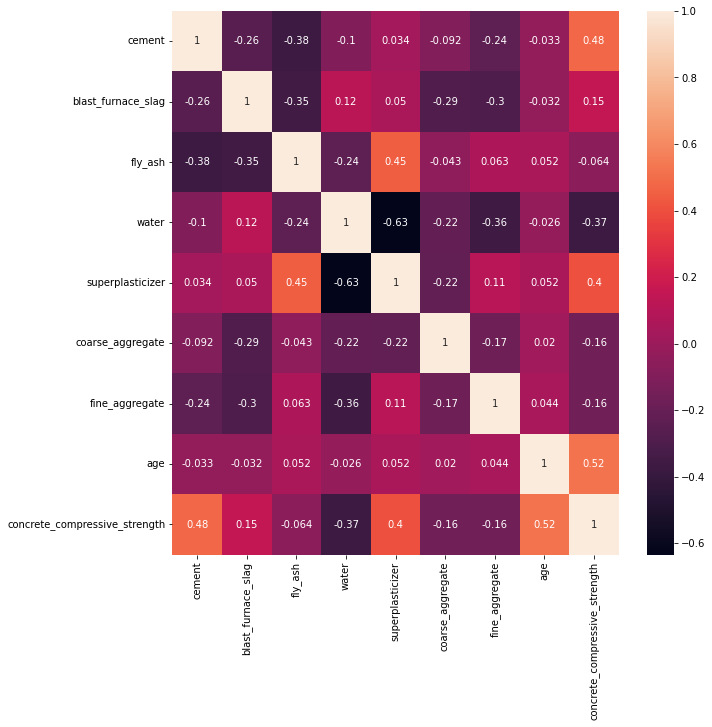

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

fly_ash is extremely low correlated with the strength. But age,cement and water is correlated with the strength.

In [51]:
data.drop(["fly_ash"],axis=1,inplace=True)

Since it does not have correlation with strength I dropped it.

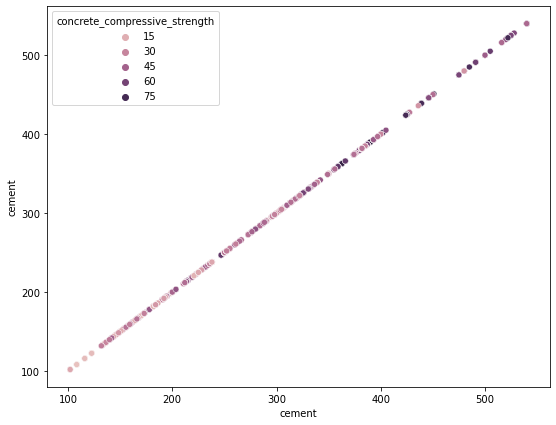

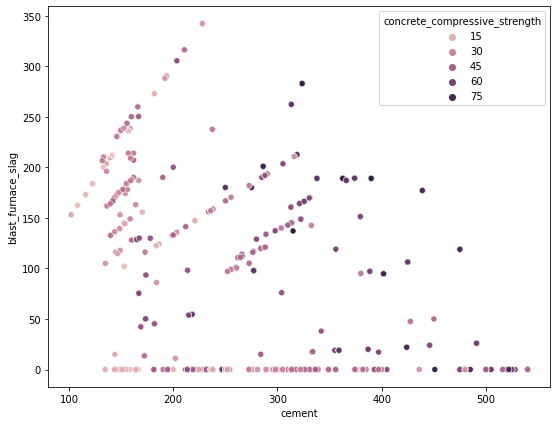

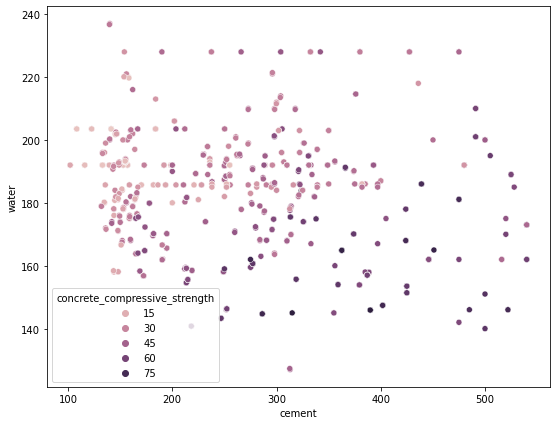

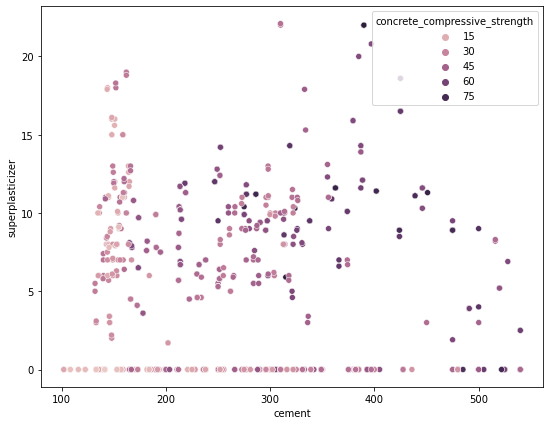

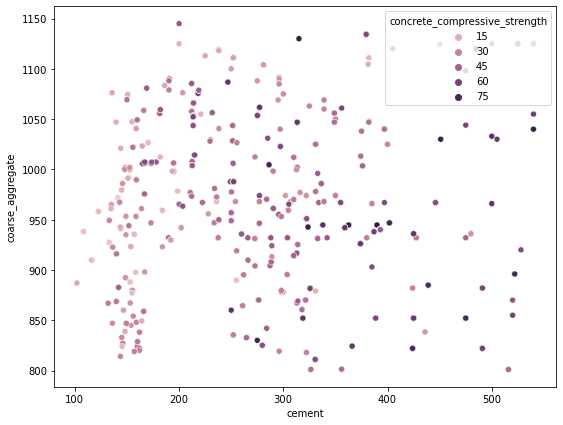

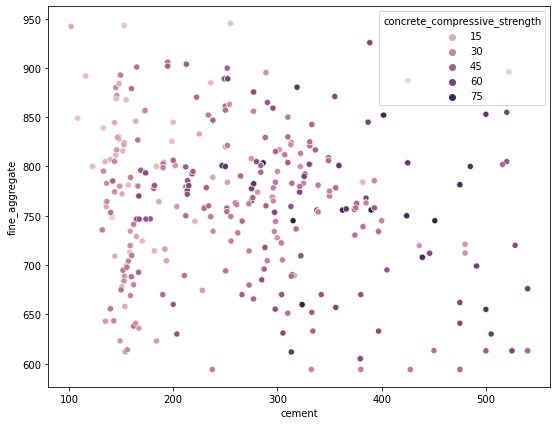

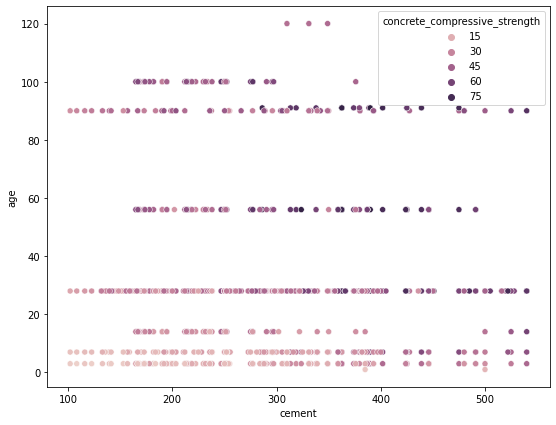

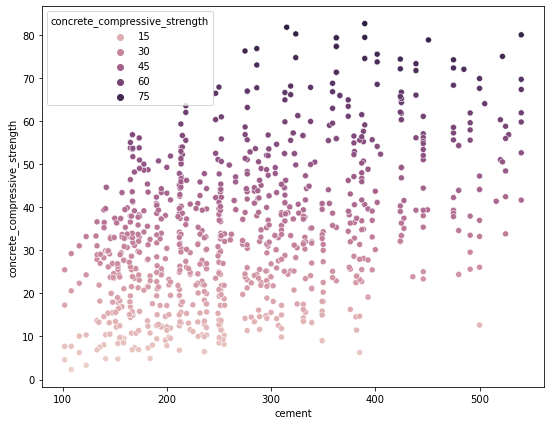

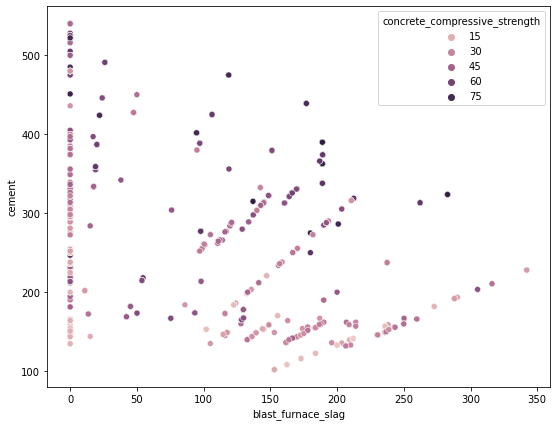

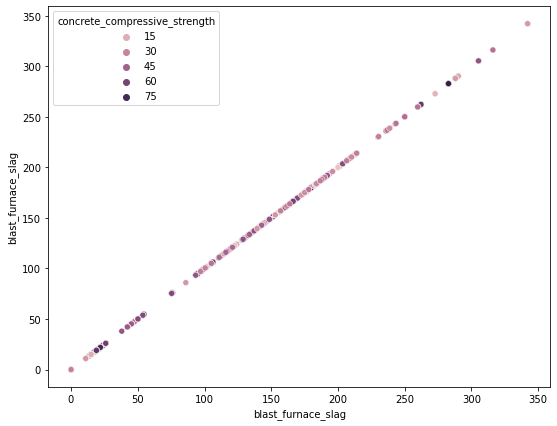

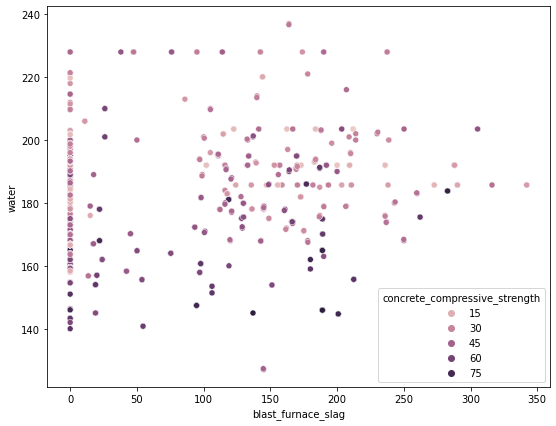

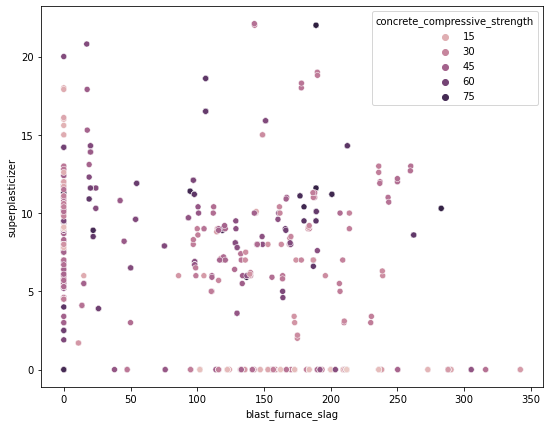

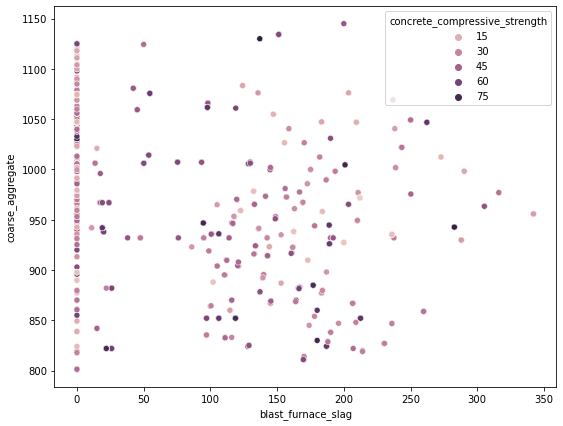

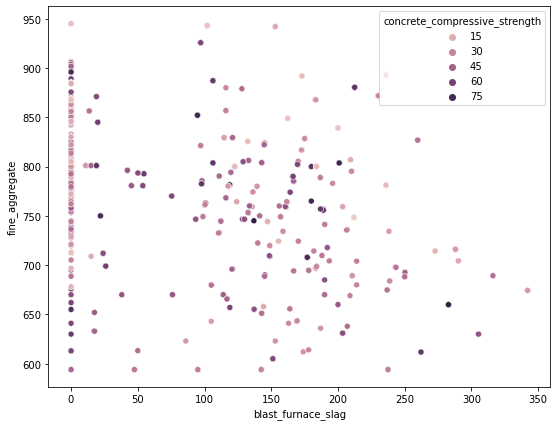

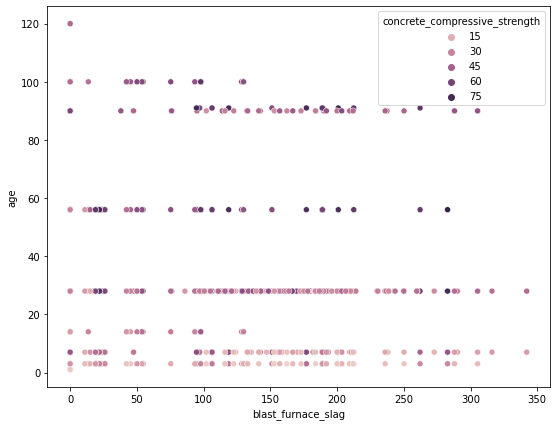

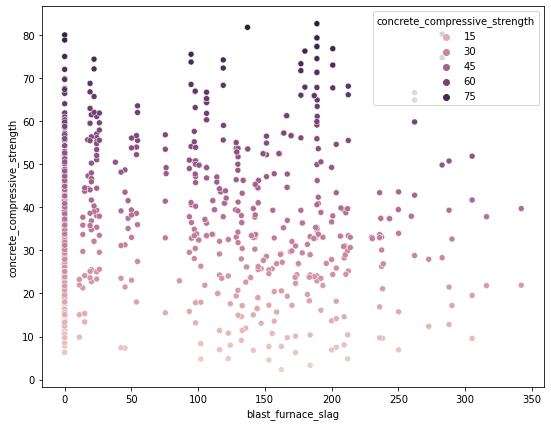

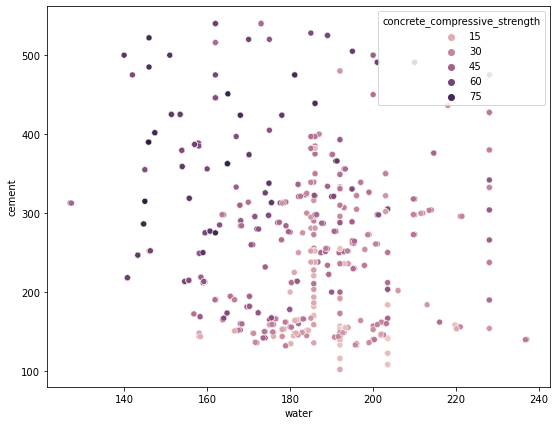

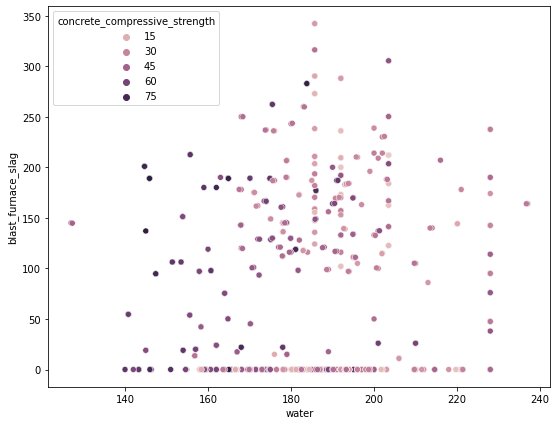

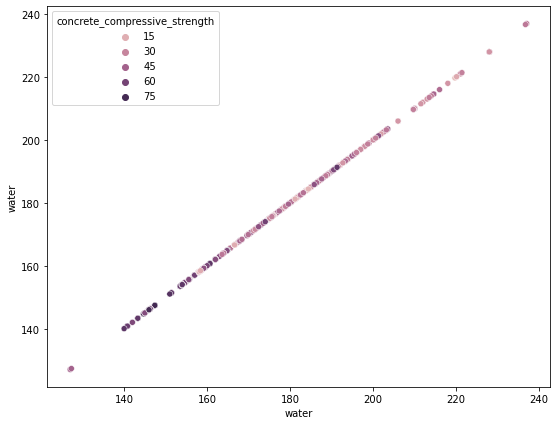

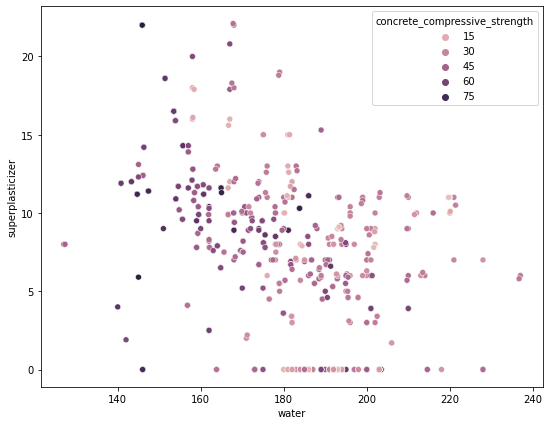

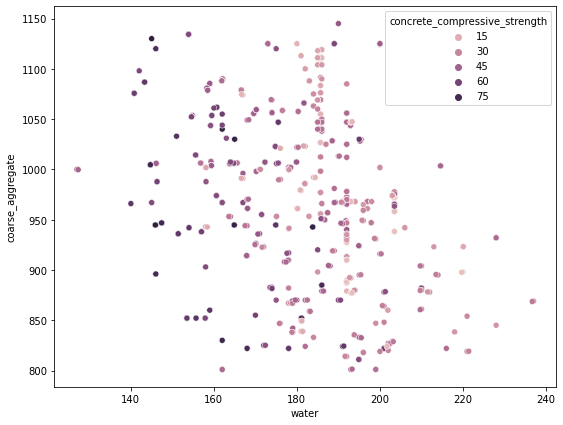

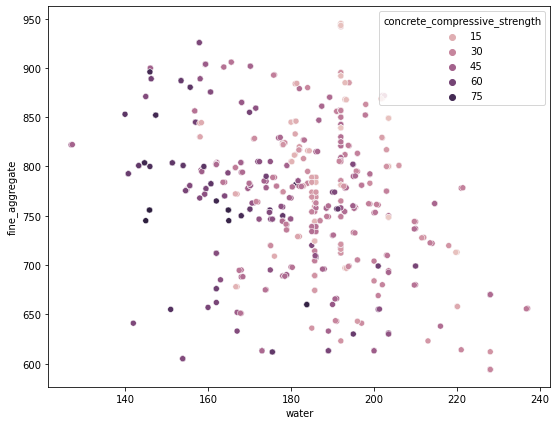

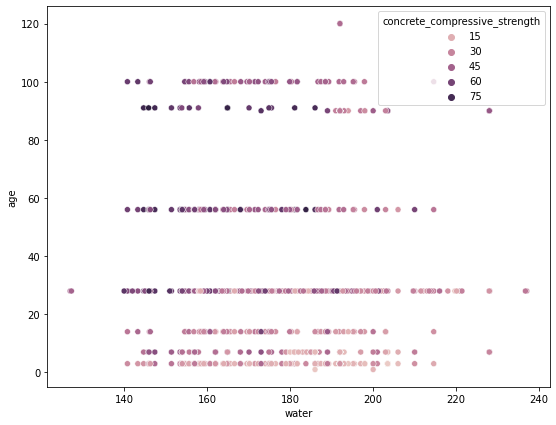

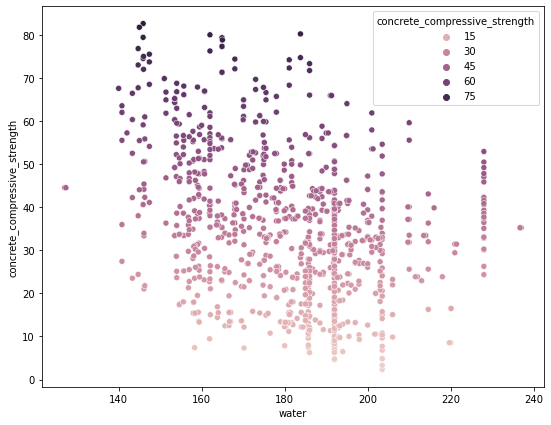

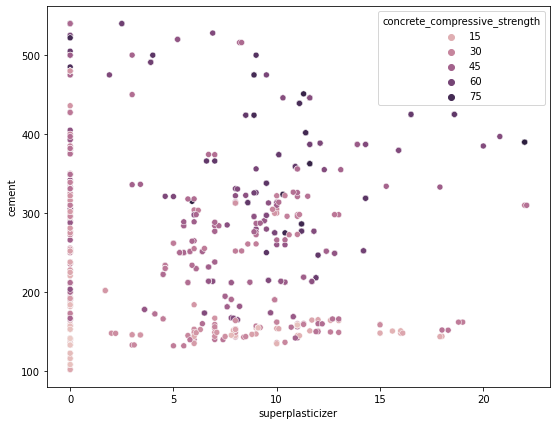

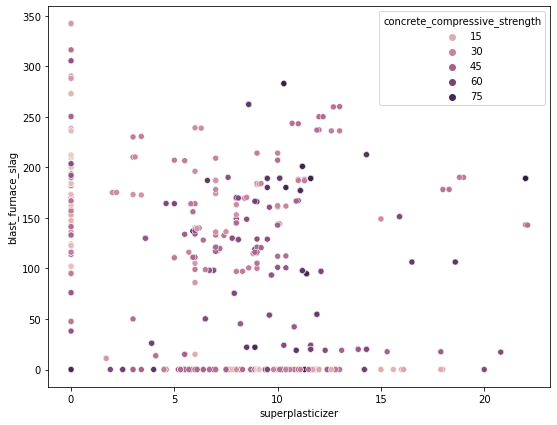

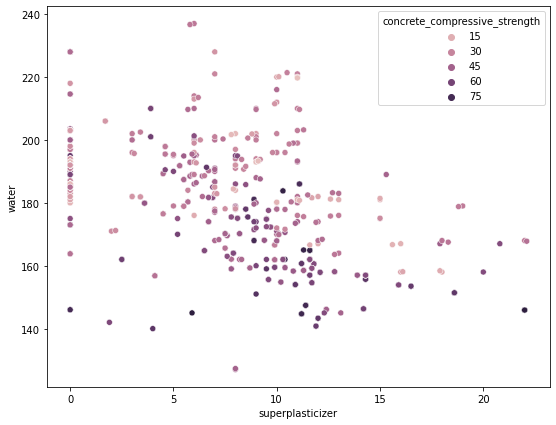

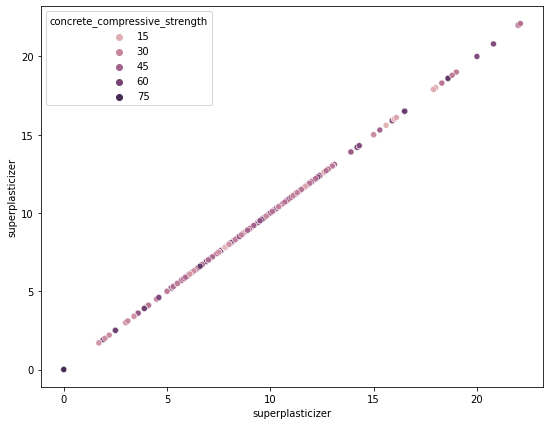

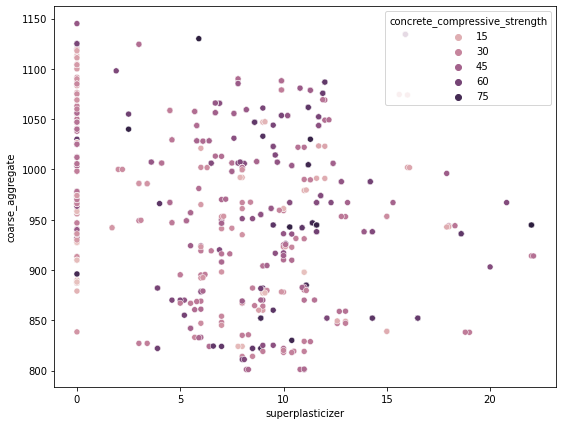

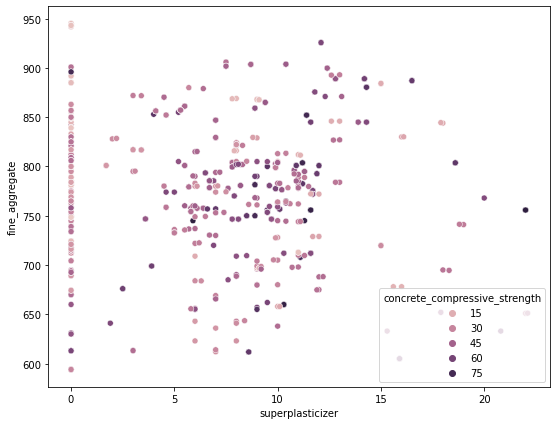

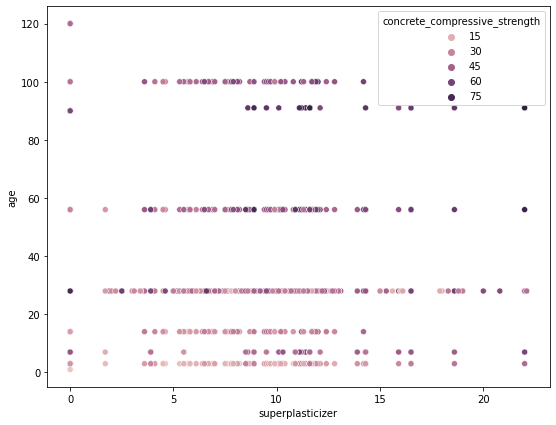

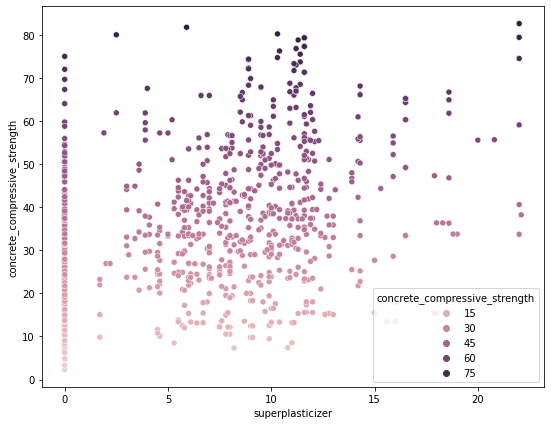

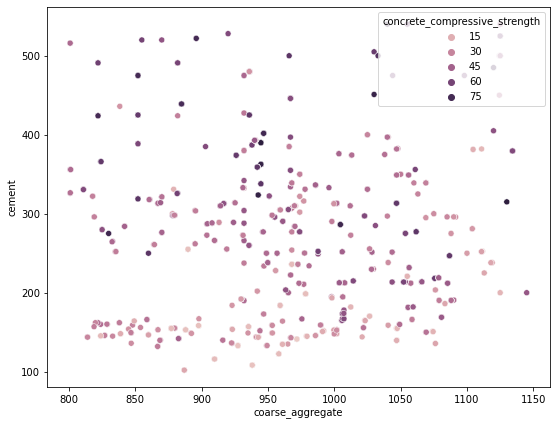

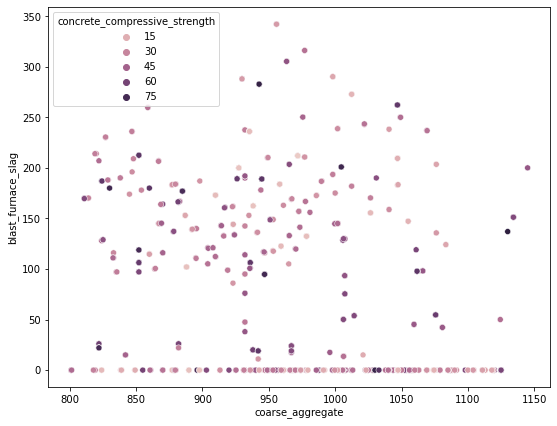

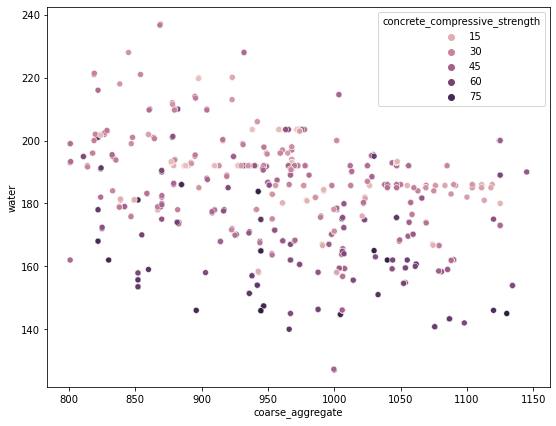

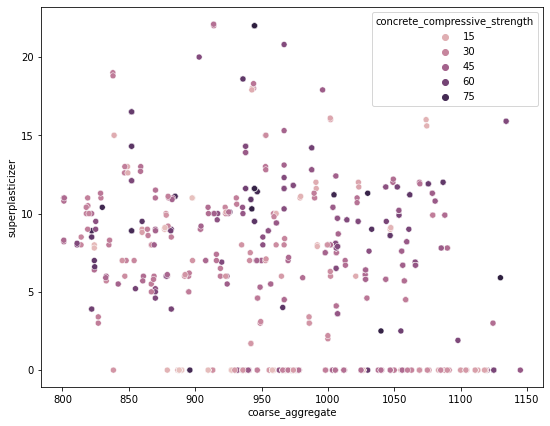

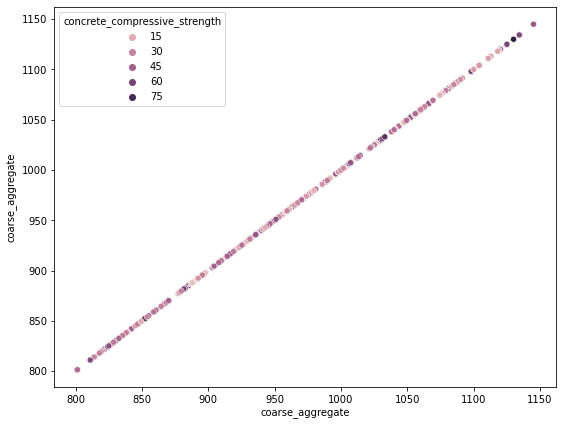

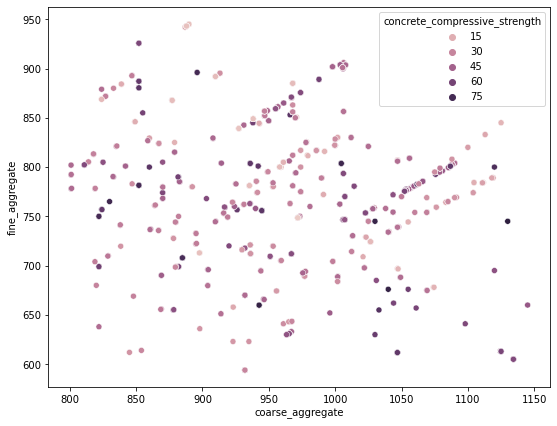

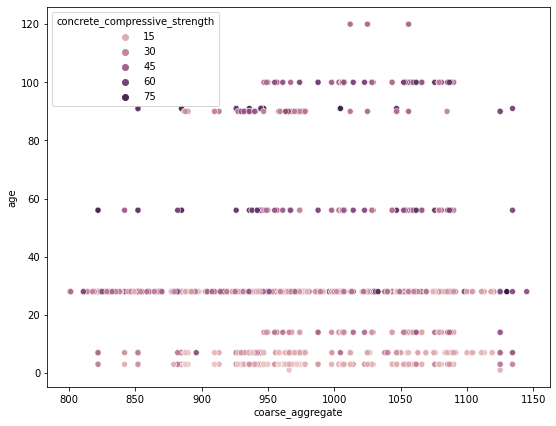

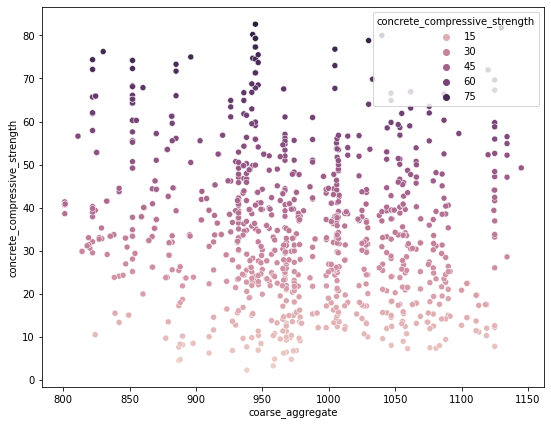

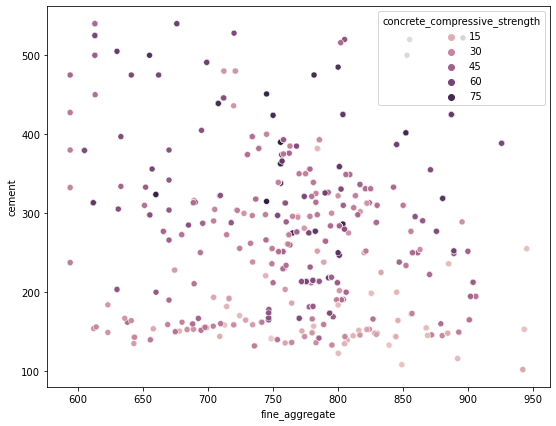

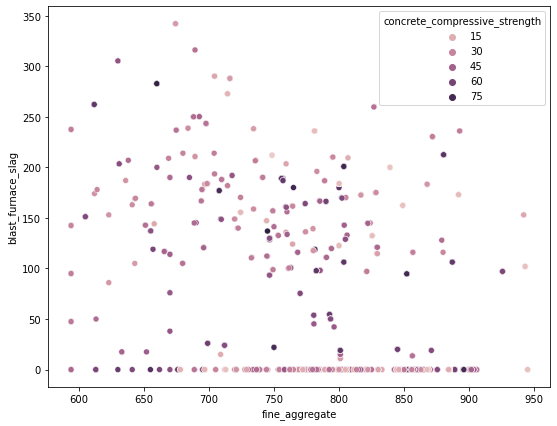

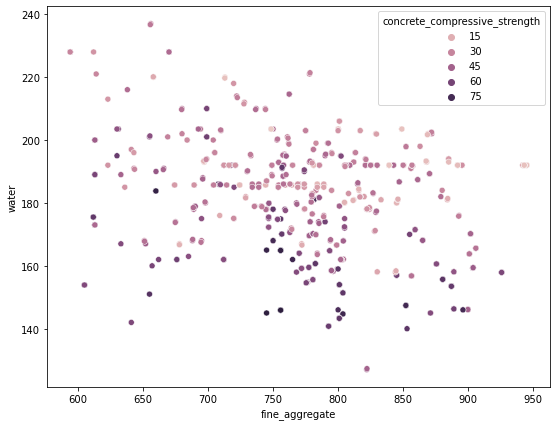

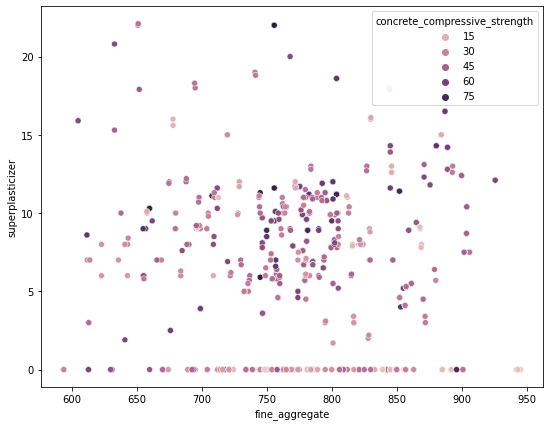

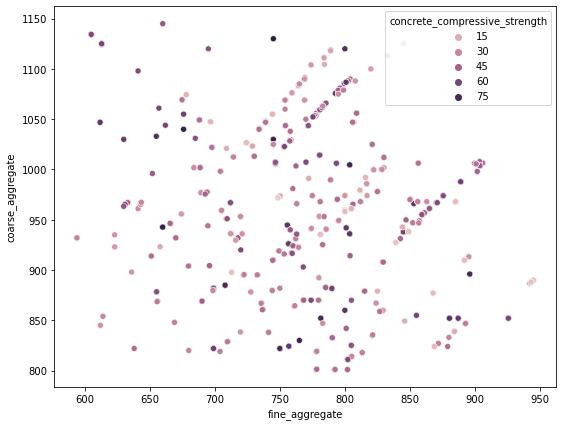

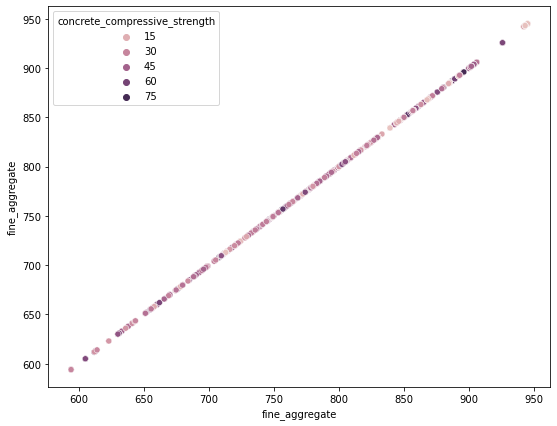

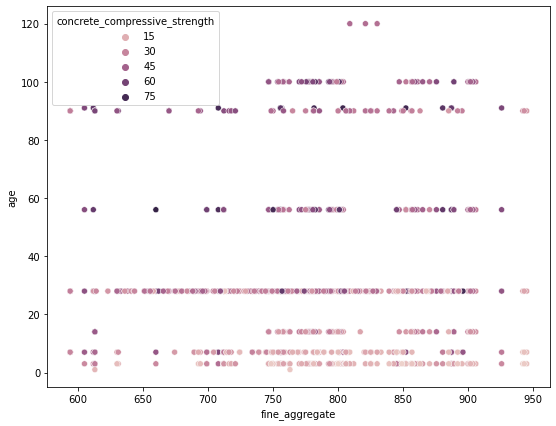

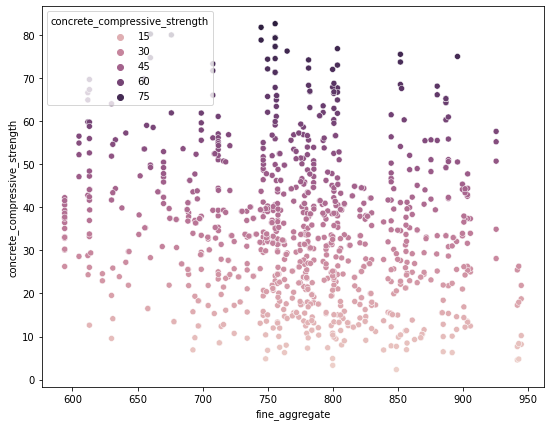

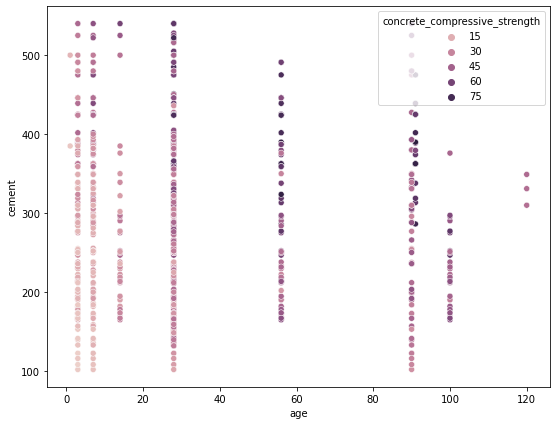

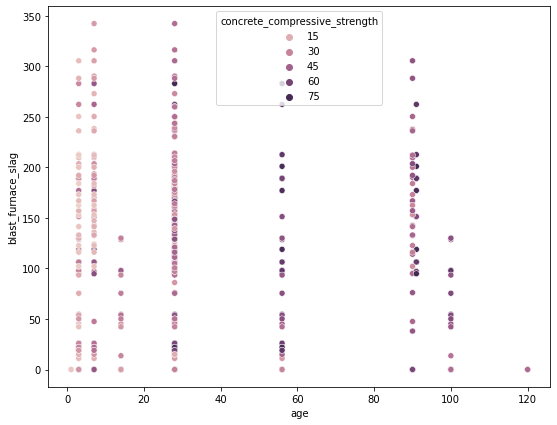

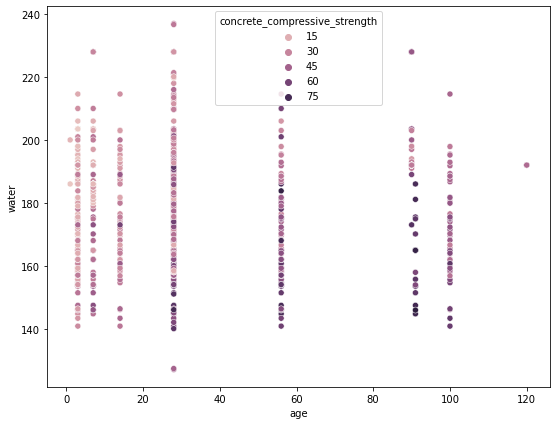

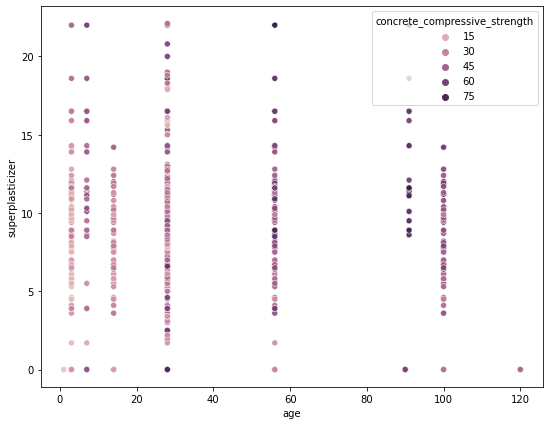

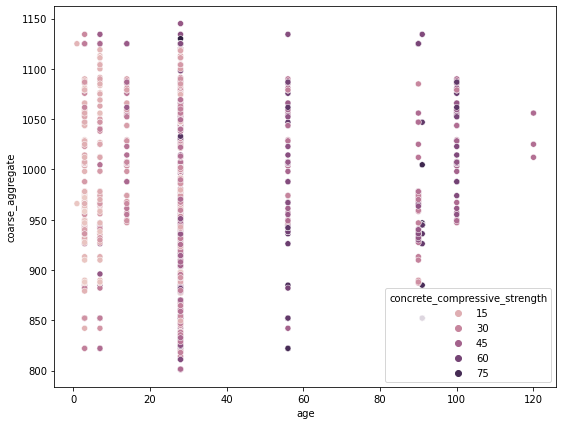

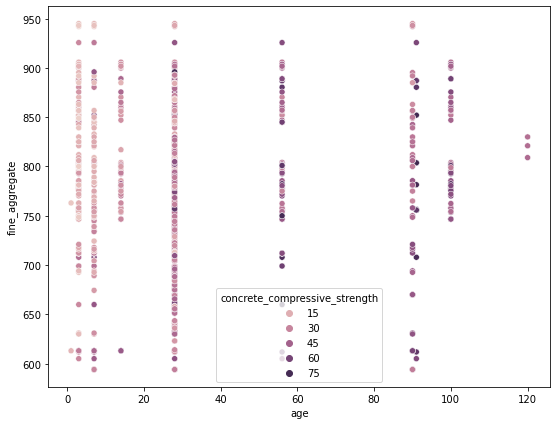

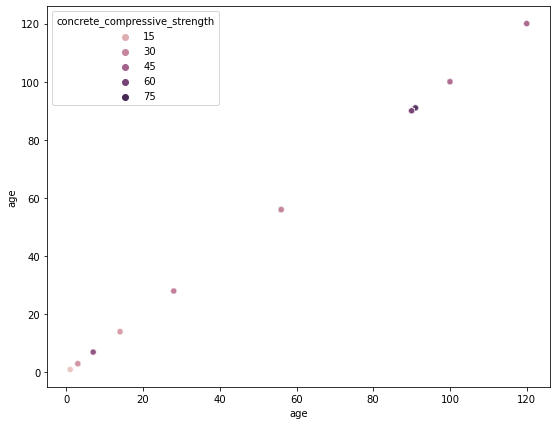

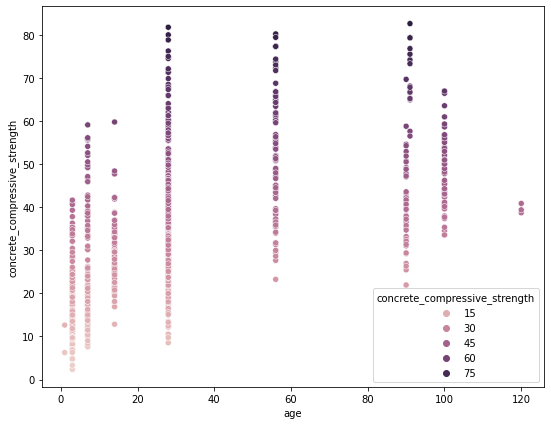

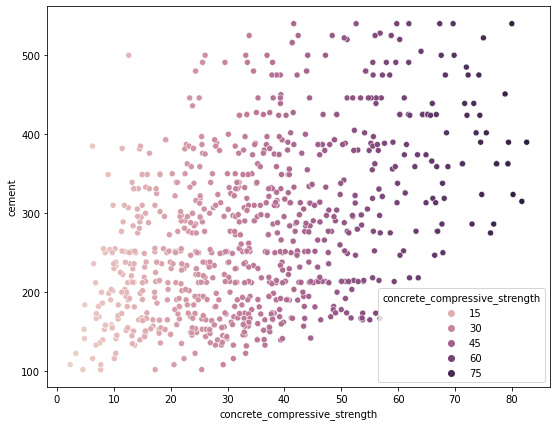

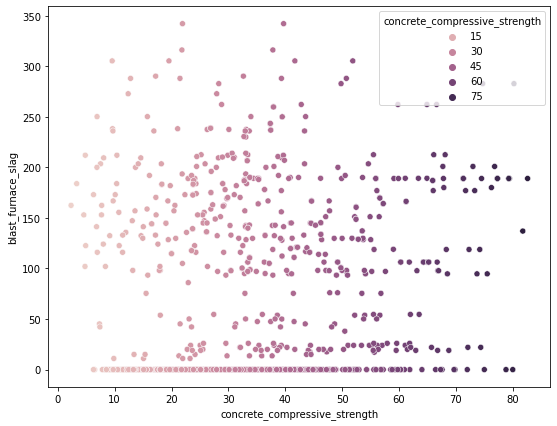

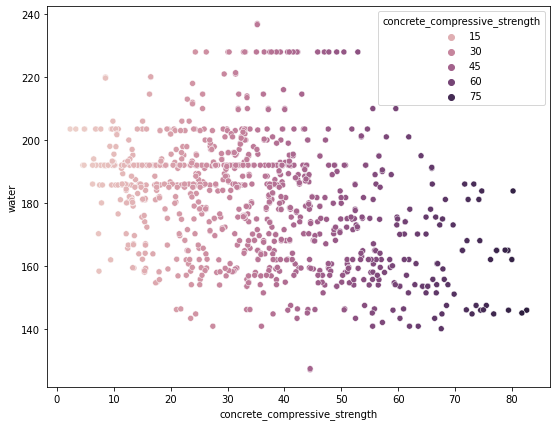

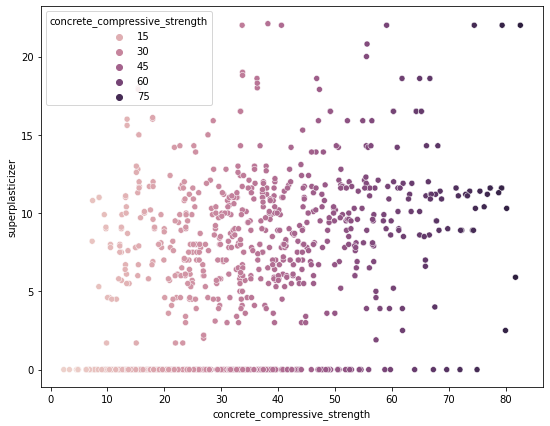

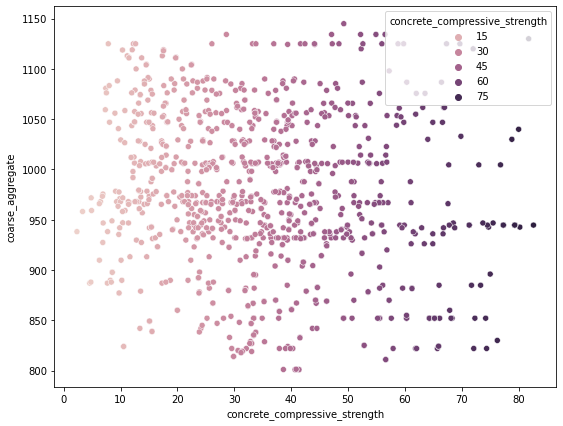

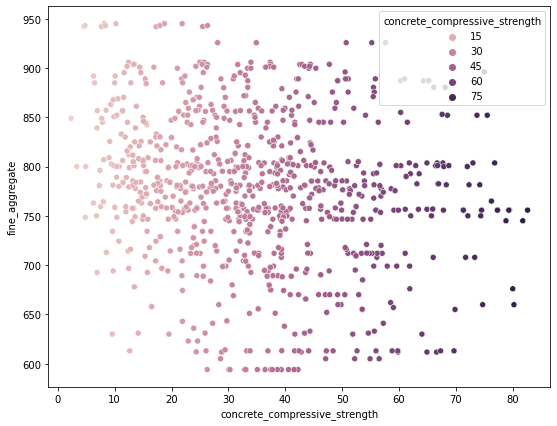

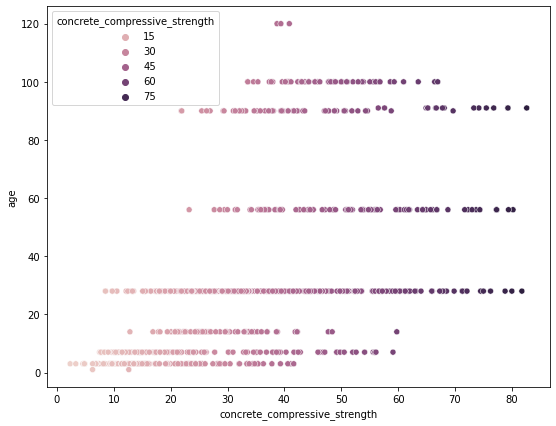

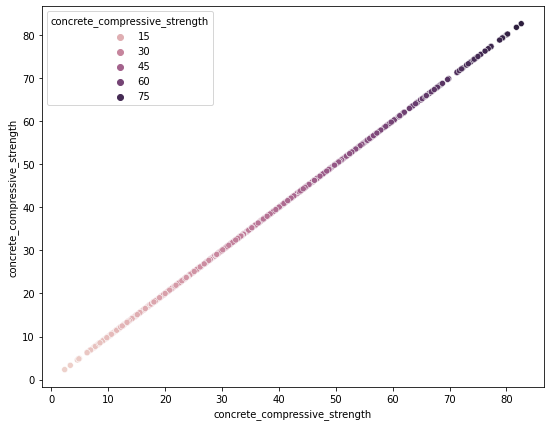

In [52]:
for i in data.columns:
    for j in data.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=data)
        plt.show()
        


In [53]:
data.columns

Index(['cement', 'blast_furnace_slag', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

When I examine the graphs I saw between fine_aggregate,coarse_aggregate and blast_furnace_slag variables and concrete_compressive_strength correlation is very low as we can see from scatter graphs so it will be better if we drop them.

In [54]:
data.drop(["blast_furnace_slag"],axis=1,inplace=True)
data.drop(["coarse_aggregate"],axis=1,inplace=True)
data.drop(["fine_aggregate"],axis=1,inplace=True)

<AxesSubplot:>

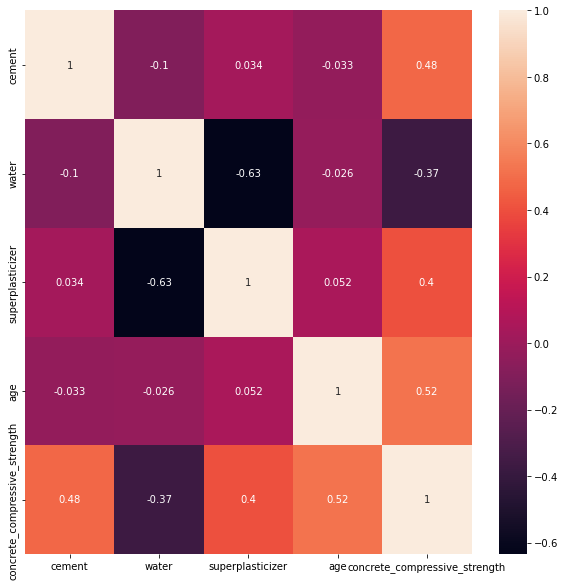

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

It is better.

# Modelling

In [56]:
x=data.drop(["concrete_compressive_strength"],axis=1)
y=data["concrete_compressive_strength"]

First I will split my x and y

In [57]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Then I will split my data as test and train.

In [59]:
Model_Names=["Linear Regression","Polynomial2","Polynomial3","Polynomial4","Random Forest","Decision Tree"]
Scores=[]

I will try 6 models and take the best one. I will just do simple thing don't go for parameters or kfold.

In [60]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [61]:
lr2=LinearRegression()
for i in np.arange(2,5): 
    pl=PolynomialFeatures(degree=i)
    x_polly=pl.fit_transform(x_train)
    x_polly_test=pl.fit_transform(x_test)
    lr2.fit(x_polly,y_train)
    y_head=lr2.predict(x_polly_test)
    Scores.append(r2_score(y_test,y_head))

In [62]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_head=rf.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [63]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_head=dt.predict(x_test)
Scores.append(r2_score(y_test,y_head))

<AxesSubplot:xlabel='Models', ylabel='Scores'>

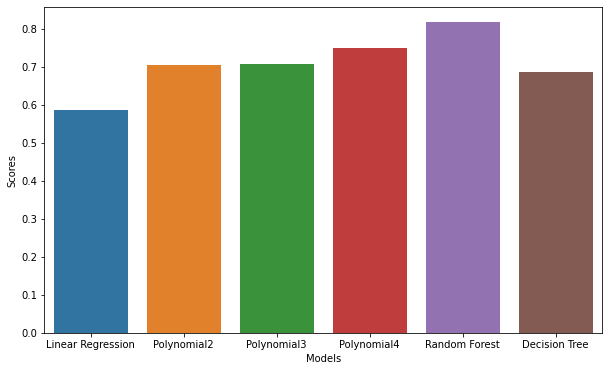

In [64]:
graph_data= pd.DataFrame(list(zip(Model_Names,Scores)),columns =['Models', 'Scores']) 
plt.figure(figsize=(10,6))
sns.barplot(x=graph_data["Models"],y=graph_data["Scores"])

As we can see Random Forest gave the best score so we can use it.

In [65]:
rf2=RandomForestRegressor(n_estimators=100,random_state=42)
rf2.fit(x_train,y_train)
y_head=rf2.predict(x_test)
print(r2_score(y_test,y_head))

0.817369901106496


Its score is 81.74% and I think it is not bad.

Text(0, 0.5, 'Predicted Data')

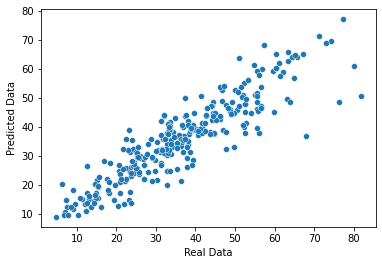

In [66]:
sns.scatterplot(x=y_test,y=y_head)
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")

When we look this scatter plot we can see the linearity, it is not perfect but can still work.

C:\Users\Shwet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shwet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


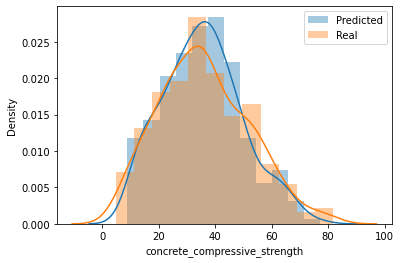

In [67]:
sns.distplot(y_head,label="Predicted")
sns.distplot(y_test,label="Real")
plt.legend()

Still it is not the best model but I think it still works.